In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
observations = 'data/observation_forms_2.csv'

In [3]:
df = pd.read_csv(observations)
df.head()

,Timestamp,Username,Name,Email,Phone Number,Date,Time Start,Court Room Number,Judge Name 1,Judge Name 2,...,The judge was punctual,Explanation.12,The judge was attentive,Explanation.13,The judge was prepared,Explanation.14,The judge was authoritative,Explanation.15,Is there anything else you wish to address?,Unnamed: 45
0,2021/10/18 11:00:00,Hannah Schmidt,garciaapril@hotmail.com,Hannah Schmidt,NaN,2021/10/18,11:00:00,Chicago Courtroom 606,Mrs. Dawn Reyes,NaN,...,Agree,NaN,Strongly Agree,NaN,Neutral,NaN,Strongly Disagree,NaN,NaN,NaN
1,2021/08/23 11:00:00,Steven Hendricks,lindawilcox@barber-ortiz.com,Steven Hendricks,NaN,2021/08/23,11:00:00,Chicago Courtroom 502,Tara Little,NaN,...,Agree,NaN,Disagree,NaN,Agree,NaN,Strongly Agree,NaN,NaN,NaN
2,2021/08/23 12:30:00,Sonya Parker,wlewis@gomez.org,Sonya Parker,NaN,2021/08/23,12:30:00,Chicago Courtroom 706,Donna Valdez,NaN,...,Neutral,NaN,Agree,NaN,Agree,NaN,Agree,NaN,NaN,NaN
3,2021/10/12 09:00:00,Michael Barker,yolandasanders@yahoo.com,Michael Barker,NaN,2021/10/12,9:00:00,Chicago Courtroom 302,Derek Frederick,NaN,...,Strongly Disagree,NaN,Disagree,NaN,Strongly Disagree,NaN,Disagree,NaN,NaN,NaN
4,2021/11/03 12:30:00,Jason Benson,ronald81@hotmail.com,Jason Benson,NaN,2021/11/03,12:30:00,Chicago Courtroom 604,NaN,NaN,...,Strongly Agree,NaN,Agree,NaN,Strongly Disagree,NaN,Strongly Disagree,NaN,NaN,NaN


### The columns are as follows:

In [4]:
df.columns

Index(['Timestamp', 'Username', 'Name', 'Email', 'Phone Number', 'Date',
       'Time Start', 'Court Room Number', 'Judge Name 1', 'Judge Name 2',
       'Notes', 'Attorneys Present', 'The judge was impartial', 'Explanation',
       'The judge was professional', 'Explanation.1', 'The judge was rational',
       'Explanation.2', 'The judge was compassionate', 'Explanation.3',
       'The judge was respectful', 'Explanation.4', 'The judge was unbiased',
       'Explanation.5', 'The judge was patient', 'Explanation.6',
       'The judge was audible', 'Explanation.7', 'The judge was intelligible',
       'Explanation.8', 'The judge's questions were relevant', 'Explanation.9',
       'The judge's decision was understandable', 'Explanation.10',
       'The judge was considerate', 'Explanation.11', 'The judge was punctual',
       'Explanation.12', 'The judge was attentive', 'Explanation.13',
       'The judge was prepared', 'Explanation.14',
       'The judge was authoritative', 'Explanation

#### We have a mapping of survey answer to numerical value

In [5]:
answers = {
    'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly Disagree': 1
}

#### And a mapping of question/column name to a category

In [6]:
categories = {
    'Integrity': ['The judge was impartial', 'The judge was professional', 'The judge was rational'],
    'Temperament': ['The judge was compassionate', 'The judge was respectful', 'The judge was unbiased', 'The judge was patient'],
    'Communication': ['The judge was audible', 'The judge was intelligible', "The judge's questions were relevant", "The judge's decision was understandable", "The judge was considerate"],
    'Administrative Performance': ['The judge was punctual', 'The judge was attentive', 'The judge was prepared', 'The judge was authoritative']    
}

#### from the mapping categories we generate the list of columns

In [7]:
category_columns = []
for category in categories.keys():
    for column in categories[category]:
        category_columns.append(column)
category_columns

['The judge was impartial',
 'The judge was professional',
 'The judge was rational',
 'The judge was compassionate',
 'The judge was respectful',
 'The judge was unbiased',
 'The judge was patient',
 'The judge was audible',
 'The judge was intelligible',
 "The judge's questions were relevant",
 "The judge's decision was understandable",
 'The judge was considerate',
 'The judge was punctual',
 'The judge was attentive',
 'The judge was prepared',
 'The judge was authoritative']

### Now we covert the values in these columns to numbers

**Note that Other responses are mapped to 0**.

In [8]:
df[category_columns] = df[category_columns].applymap(lambda answer: answers[answer] if answer in answers else 0)

In [9]:
df.head()

,Timestamp,Username,Name,Email,Phone Number,Date,Time Start,Court Room Number,Judge Name 1,Judge Name 2,...,The judge was punctual,Explanation.12,The judge was attentive,Explanation.13,The judge was prepared,Explanation.14,The judge was authoritative,Explanation.15,Is there anything else you wish to address?,Unnamed: 45
0,2021/10/18 11:00:00,Hannah Schmidt,garciaapril@hotmail.com,Hannah Schmidt,NaN,2021/10/18,11:00:00,Chicago Courtroom 606,Mrs. Dawn Reyes,NaN,...,4,NaN,5,NaN,3,NaN,1,NaN,NaN,NaN
1,2021/08/23 11:00:00,Steven Hendricks,lindawilcox@barber-ortiz.com,Steven Hendricks,NaN,2021/08/23,11:00:00,Chicago Courtroom 502,Tara Little,NaN,...,4,NaN,2,NaN,4,NaN,5,NaN,NaN,NaN
2,2021/08/23 12:30:00,Sonya Parker,wlewis@gomez.org,Sonya Parker,NaN,2021/08/23,12:30:00,Chicago Courtroom 706,Donna Valdez,NaN,...,3,NaN,4,NaN,4,NaN,4,NaN,NaN,NaN
3,2021/10/12 09:00:00,Michael Barker,yolandasanders@yahoo.com,Michael Barker,NaN,2021/10/12,9:00:00,Chicago Courtroom 302,Derek Frederick,NaN,...,1,NaN,2,NaN,1,NaN,2,NaN,NaN,NaN
4,2021/11/03 12:30:00,Jason Benson,ronald81@hotmail.com,Jason Benson,NaN,2021/11/03,12:30:00,Chicago Courtroom 604,NaN,NaN,...,5,NaN,4,NaN,1,NaN,1,NaN,NaN,NaN


**remove rows where value in these category columns is 0** because that means the response was Unsure

In [10]:
# df = df[(df[category_columns] != 0).all(axis=1)]

# PART 1: GENERAL FIGURES

## JUDGES OBSERVED

In [11]:
KNOWN_JUDGES_OBSERVED = len(df[df['Judge Name 1'].notna()]['Judge Name 1'].unique())
KNOWN_JUDGES_OBSERVED

388

In [12]:
NEW_JUDGES_OBSERVED = len(df[df['Judge Name 2'].notna()]['Judge Name 2'].unique())
NEW_JUDGES_OBSERVED

0

## COURT SESSIONS REVIEWED

**How do we compute this in our data**

In [13]:
COURT_SESSIONS_REVIEWED = 0
COURT_SESSIONS_REVIEWED

0

# PART 2: SUMMARY STATISTICS BY CATEGORY

## FOR SIMPLICITY OF PROTOTYPE WE IGNORE ROWS WHERE ANY VALUE IS 0: UNSURE

In [14]:
df = df[(df[category_columns] != 0).all(axis=1)]

## Compute Row wise averages for each category

In [15]:
categories

{'Integrity': ['The judge was impartial',
  'The judge was professional',
  'The judge was rational'],
 'Temperament': ['The judge was compassionate',
  'The judge was respectful',
  'The judge was unbiased',
  'The judge was patient'],
 'Communication': ['The judge was audible',
  'The judge was intelligible',
  "The judge's questions were relevant",
  "The judge's decision was understandable",
  'The judge was considerate'],
 'Administrative Performance': ['The judge was punctual',
  'The judge was attentive',
  'The judge was prepared',
  'The judge was authoritative']}

In [16]:
summary_stats = {}
for category in categories:
    df[category] = df[categories[category]].mean(axis=1)
    summary_stats[category] = df[category].describe()

In [20]:
summary_stats['Integrity']['mean']

3.0015333333333336

In [31]:
summary_stats

{'Integrity': count    5000.000000
 mean        3.001533
 std         0.813727
 min         1.000000
 25%         2.333333
 50%         3.000000
 75%         3.666667
 max         5.000000
 Name: Integrity, dtype: float64,
 'Temperament': count    5000.00000
 mean        2.99440
 std         0.69994
 min         1.00000
 25%         2.50000
 50%         3.00000
 75%         3.50000
 max         5.00000
 Name: Temperament, dtype: float64,
 'Communication': count    5000.000000
 mean        2.999880
 std         0.621564
 min         1.000000
 25%         2.600000
 50%         3.000000
 75%         3.400000
 max         5.000000
 Name: Communication, dtype: float64,
 'Administrative Performance': count    5000.000000
 mean        2.994450
 std         0.707412
 min         1.000000
 25%         2.500000
 50%         3.000000
 75%         3.500000
 max         5.000000
 Name: Administrative Performance, dtype: float64}

## Histograms

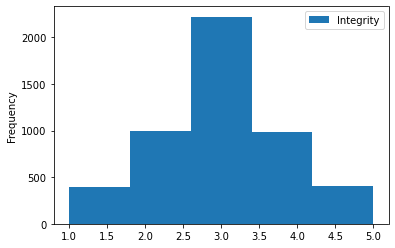

In [27]:
integrity = df['Integrity'].plot.hist(bins=5, alpha=1, legend=True)

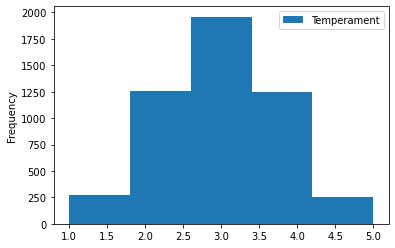

In [28]:
integrity = df['Temperament'].plot.hist(bins=5, alpha=1, legend=True)

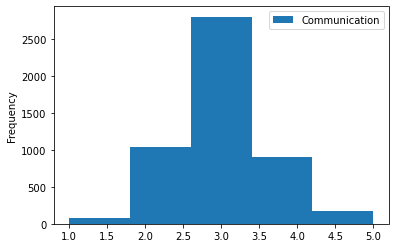

In [29]:
integrity = df['Communication'].plot.hist(bins=5, alpha=1, legend=True)

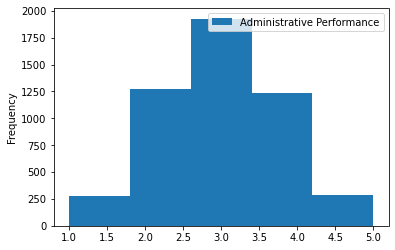

In [30]:
integrity = df['Administrative Performance'].plot.hist(bins=5, alpha=1, legend=True)

## Pie Charts

In [36]:
thresh = 2.5

In [37]:
thresholds = { category:thresh for category in summary_stats }

In [44]:
integrity_thresh = df['Integrity'].map(lambda value: value > thresholds['Integrity'])
temperament_thresh = df['Temperament'].map(lambda value: value > thresholds['Temperament'] )
communication_thresh = df['Communication'].map(lambda value: value > thresholds['Communication'] )
amin_thresh = df['Administrative Performance'].map(lambda value: value > thresholds['Administrative Performance'] )

In [45]:
plot = integrity_thresh.plot.pie(y='Integrity', figsize=(5, 5))

TypeError: no numeric data to plot

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

In [18]:
df.plot.hist(by='Integrity', bins=5, x='Integrity', y='frequency')

KeyError: 'frequency'